#Telecom Customers Churn Prediction
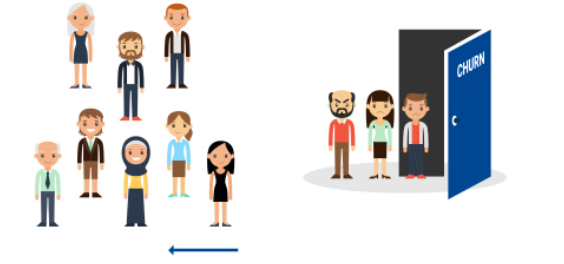
 



Customer churn is defined as when customers or subscribers 
discontinue doing business with a firm or service.

* Telecom service providers use customer attrition analysis as   
one of their key business metrics because the cost of    
retraining an existing customer is far less than acquiring a 
new one.

* Machine learning algorithms help companies analyze 
customer attrition rate based on several factors
which include various services subscribed by the customers, tenure rate, gender, senior citizen, payment method, etc.

#Import Libraries

In [ ]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import math #extends the list of mathematical functions.
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import LabelEncoder #Encoding the target column
from sklearn.model_selection import train_test_split # split the data in training and testing sets
from sklearn.linear_model import LogisticRegression # LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score ,roc_curve # accuracy_score
from sklearn.metrics import classification_report # classification_report
from imblearn.over_sampling import SMOTE # make the data more balanced
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.ensemble import GradientBoostingClassifier  #GradientBoostingClassifier
from sklearn import metrics #evaluate models


In [ ]:
# import telecom dataset into a pandas data frame
tele_df = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')
# visualize column names
tele_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# check unique values of each column
for column in tele_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, tele_df[column].unique()))
    print('==='*15)

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

#Exploratory Data Analysis(EDA)

In [ ]:
# summary of the data frame
tele_df.info()
#Apparently, there are no null values on the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check the shape of the dataframe
tele_df.shape
#the data set contains 7043 observations and 21 columns

(7043, 21)

In [ ]:
#computes a summary of statistics pertaining to the numerical columns in datframe
tele_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
#computes a summary of statistics pertaining to the numerical columns in datframe
tele_df.describe(exclude='number').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
#data type of each column
tele_df.dtypes
#the column TotalCharges was wrongly detected as an object

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# transform the column TotalCharges into a numeric data type
tele_df['TotalCharges'] = pd.to_numeric(tele_df['TotalCharges'], errors='coerce')

In [ ]:
# null observations of the TotalCharges column
tele_df[tele_df['TotalCharges'].isnull()]
#These observations have also a tenure of 0 even though MontlyCharges is not null for these entries.
#This information appeared to be contradictory so I will remove those observations from the data set

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# drop observations with null values
tele_df.dropna(inplace=True)

In [ ]:
#The customerID column is useless to explain whether not the customer will churn.
# drop the customerID column from the dataset
tele_df.drop(columns='customerID', inplace=True)

In [ ]:
# unique elements of the PaymentMethod column
tele_df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
#some payment method values contain in parenthesis the word automatic.
#These denominations are too long to be used as tick labels in further visualizations.
# remove (automatic) from payment method names
tele_df['PaymentMethod'] = tele_df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [ ]:
# unique elements of the PaymentMethod column after the modification 
tele_df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [ ]:
#return skewness per Numeric feature:
tele_df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [ ]:
#count and drop duplicates
print(tele_df.duplicated().sum())
tele_df.drop_duplicates(inplace=True)


22


#Data Visualization

In [ ]:
# proportion of observation of each class
tele_df['Churn'].value_counts()

No     5153
Yes    1857
Name: Churn, dtype: int64

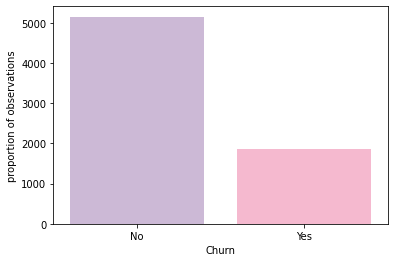

In [ ]:
sns.countplot(x= 'Churn',  data=tele_df,palette=["#cdb4db", "#ffafcc"])
plt.xlabel('Churn')
plt.ylabel('proportion of observations')
plt.show()

In [ ]:

#The following code creates a stacked bar for each demographic attribute (gender, SeniorCitizen, Partner, Dependents)
#showing the percentage of Churn for each category of the attribute.
def percentage_stacked_plot(columns_to_plot, super_title,color):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
                    color : color 
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(tele_df[column], tele_df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=color)

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=8, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

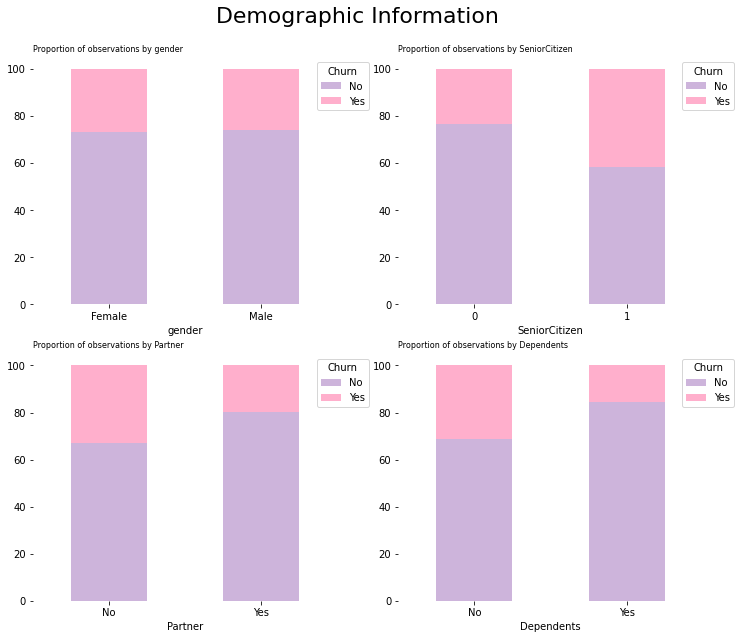

In [ ]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information',["#cdb4db", "#ffafcc"])

from the above  figure I can extract the following conclusions by analyzing demographic attributes:

* The churn rate of senior citizens is almost double that of young citizens.
* the gender column don't have significant predictive power.A similar percentage of churn is shown both when a customer is a man or a woman.
* Customers with a partner churn less than customers with no partner.

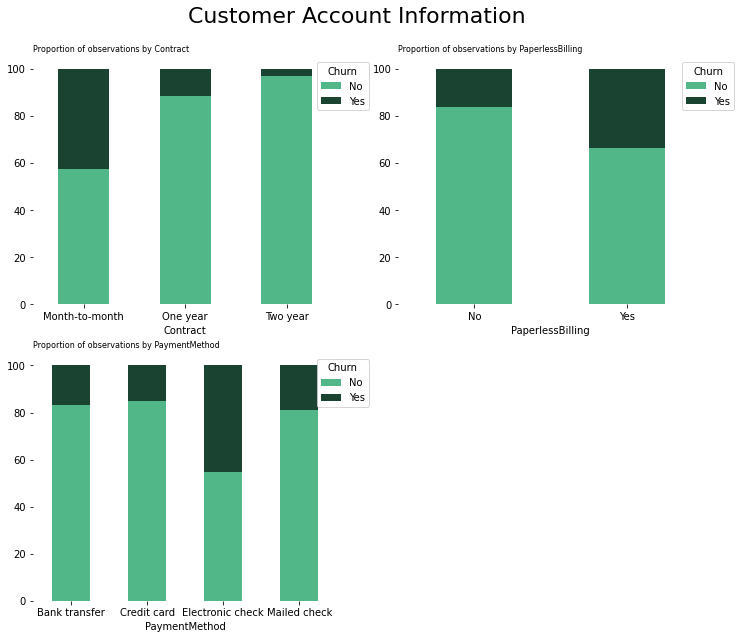

In [ ]:
#evaluate the percentage of Churn for each category of the customer account attributes (Contract, PaperlessBilling, PaymentMethod).
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']
# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information',["#52b788", "#1b4332"])

According to the above figure, I can draw the following conclusions from analyzing customer account attributes:
* Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.

* Customers who opted for an electronic check as paying method are more likely to leave the company.

* Customers subscribed to paperless billing churn more than those who are not subscribed.

In [ ]:
# plot the distribution of tenure, MontlyCharges, TotalCharges by Churn.
def histogram_plots(columns_to_plot, super_title):
  '''      Prints a histogram for each independent variable of the list columns_to_plot.
           Parameters: 
           columns_to_plot (list of string): Names of the variables to plot
           super_title (string): Super title of the visualization
          
          Returns:
          None
   '''
  
  number_of_columns = 2
  number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
  fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
  fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each demographic column name to create a subplot
  for index, column in enumerate(columns_to_plot, 1): 
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
    tele_df[tele_df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                    alpha=0.5, color='springgreen', label='No')
    tele_df[tele_df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                    alpha=0.5, color='salmon', label='Yes')
    
    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.3, 0.3, 0.3, 0.3),
              title='Churn', fancybox=True)

    # set title and labels
    ax.set_title('Distribution of ' + column + ' by churn',
                  fontsize=10, loc='left')

    ax.tick_params(rotation='auto')

      # eliminate the frame from the plot
    spine_names = ('top', 'right', 'bottom', 'left')
    for spine_name in spine_names:
      ax.spines[spine_name].set_visible(False)
            


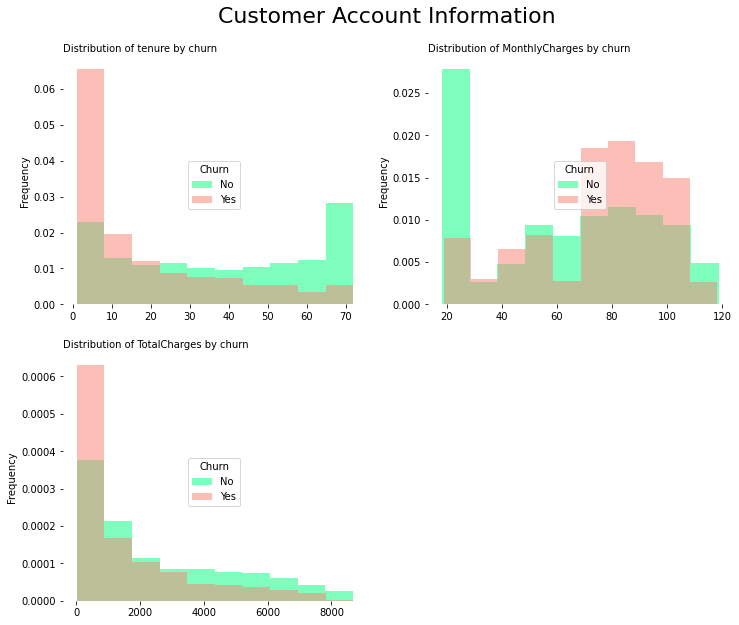

In [ ]:
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, 'Customer Account Information')

According to the above figure, I can draw the following conclusions from analyzing customer account attributes:
* The churn rate tends to be larger when monthly charges are high.
* New customers (low tenure) are more likely to churn.
* Clients with high total charges are less likely to leave the company.

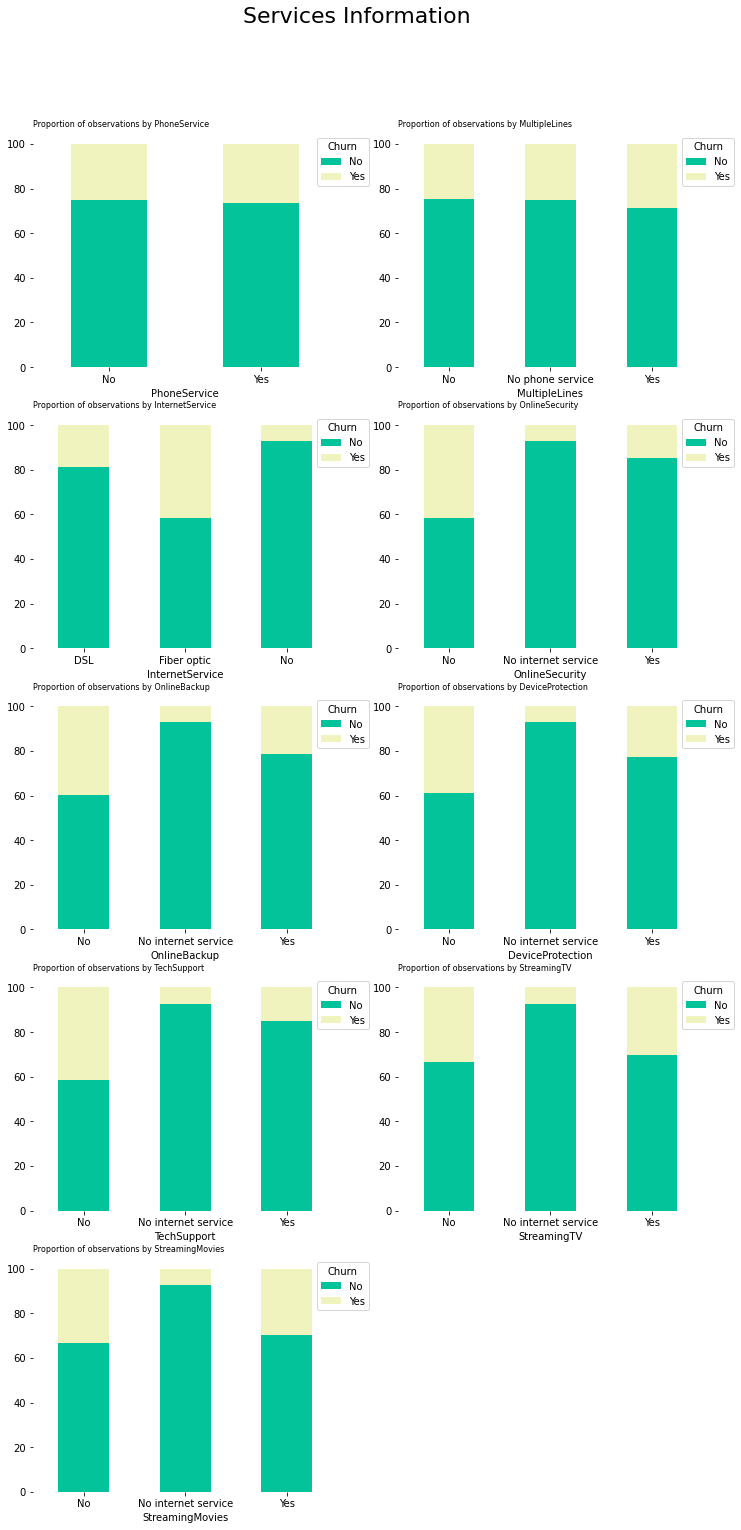

In [ ]:
# plot the percentage of the target for each category of the services columns with stacked bar plots.
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information',['#02c39a','#f0f3bd'])

According to the above figure, I can draw the following conclusions from analyzing customer account attributes:
* the phone attributes (PhoneService and MultipleLines) don't have significant predictive power.The percentage of churn for all classes in both independent variables is nearly the same.

* Clients with online security churn less than those without it.

* Customers with no tech support tend to churn more often than those with tech support.

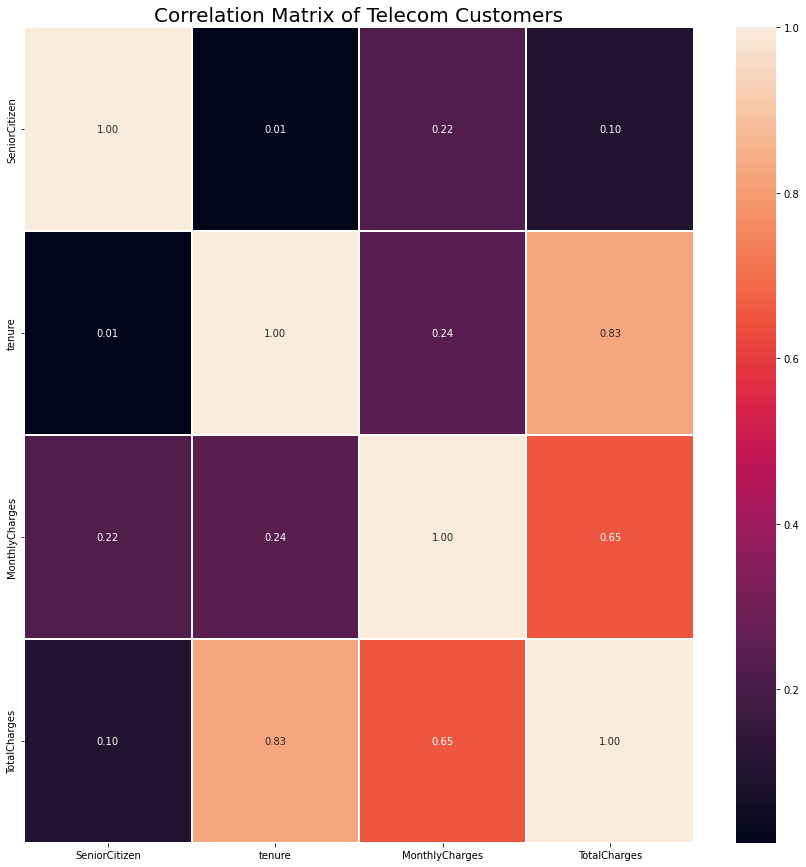

In [ ]:
# Correlation Matrix

corr_matrix = tele_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()
# It is clearly shown that "tenure" and "total charges" are highly correlated.

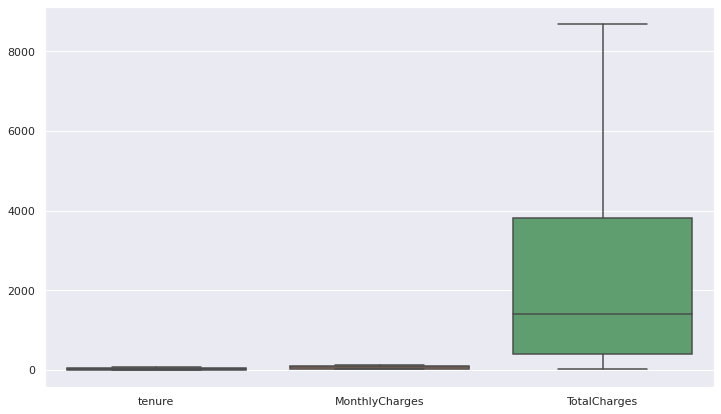

In [ ]:
df = tele_df[['tenure', 'MonthlyCharges', 'TotalCharges']]
sns.set(style = 'darkgrid')
plt.figure(figsize = (12, 7))
ax = sns.boxplot(data=df)
#the data need normalization

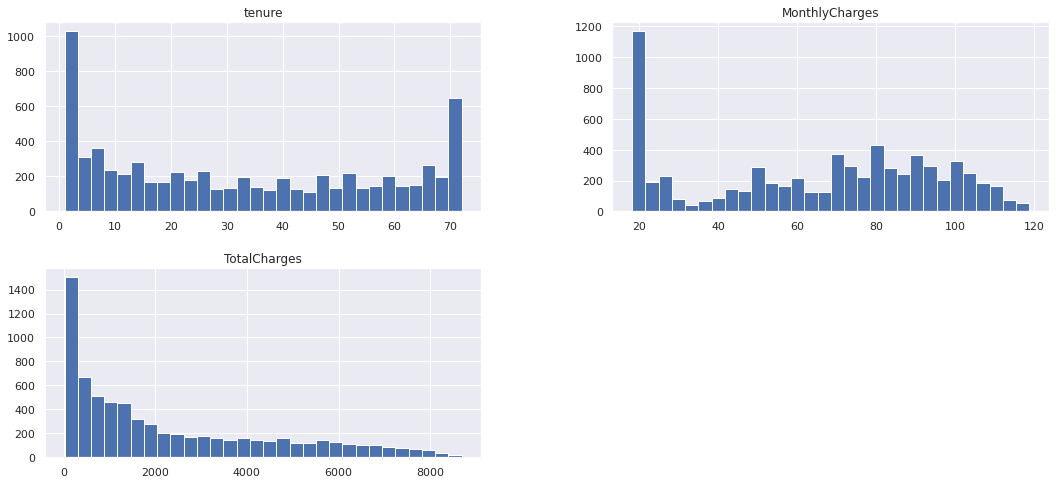

In [ ]:
# tenure and MonthlyCharges and TotalCharges historam ditribution
tele_df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(18, 8));

#IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING

Mutual information measures the mutual dependency between two variables based on entropy estimations.Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target.The following code computes the mutual information score between each categorical variable of the data set and the Churn variable.

In [ ]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, tele_df.Churn)

# select categorial variables excluding the response variable 
categorical_variables = tele_df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098031
OnlineSecurity      0.064617
TechSupport         0.062960
InternetService     0.055676
OnlineBackup        0.046743
PaymentMethod       0.044250
DeviceProtection    0.043883
StreamingMovies     0.032150
StreamingTV         0.032041
PaperlessBilling    0.018934
Dependents          0.014131
Partner             0.011180
MultipleLines       0.000874
PhoneService        0.000062
gender              0.000038
dtype: float64


As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. 

In [ ]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
tele_df = tele_df.drop(["gender", "PhoneService", "MultipleLines"], axis = "columns")

In [ ]:
tele_df_transformed = tele_df.copy()

# label encoding (binary variables)
label_encoding_columns = ['Partner', 'Dependents', 'PaperlessBilling','Churn']
le = LabelEncoder()
# encode categorical binary features using label encoding
for column in label_encoding_columns:
  tele_df_transformed[column] = le.fit_transform(tele_df_transformed[column])


In [ ]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = [ 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding

tele_df_transformed = pd.get_dummies(tele_df_transformed, columns = one_hot_encoding_columns)

Assigning input features to X and output (Churn) to y 


In [ ]:
# select independent variables
X = tele_df_transformed.drop(columns='Churn')

# select dependent variables
y = tele_df_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check'],
      dtype='object')
Churn


In [ ]:
# make the dataset more blanced
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=40, shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

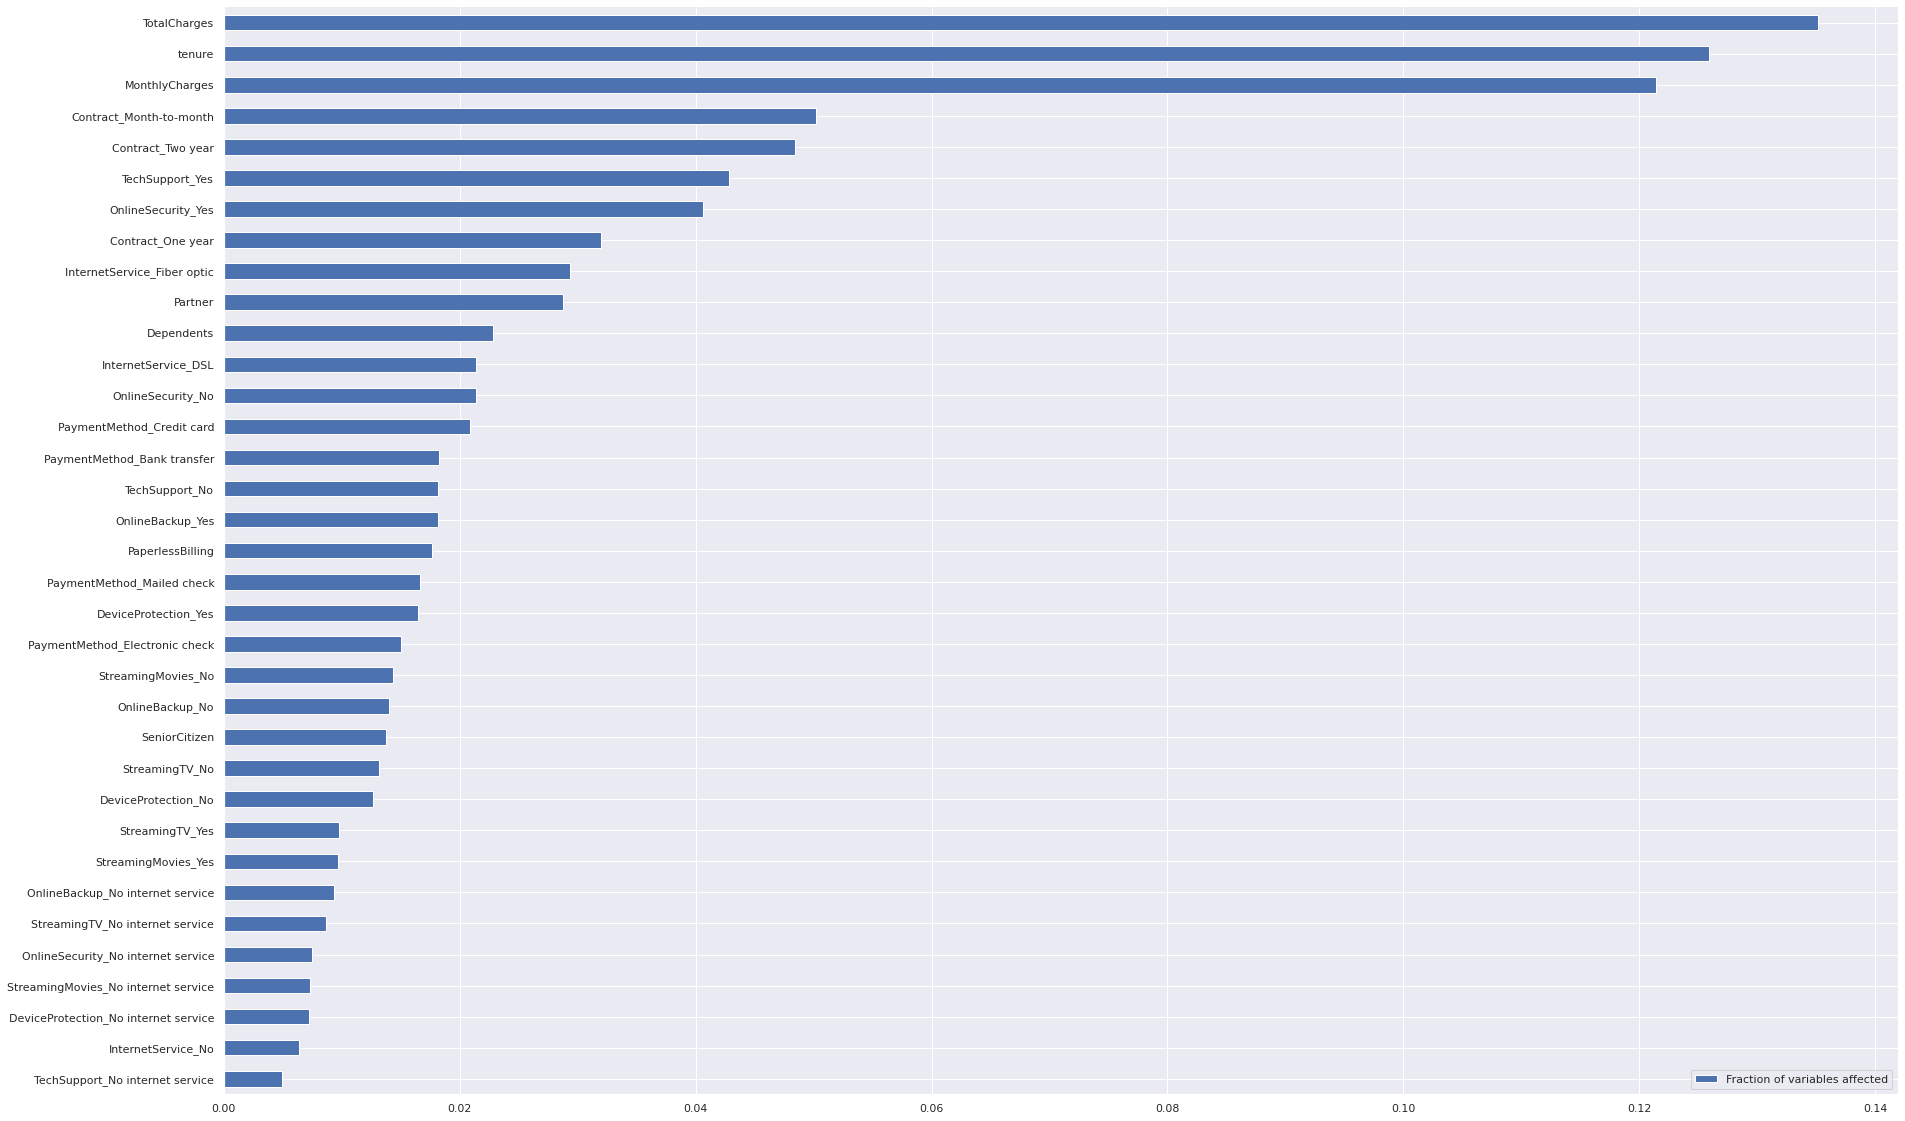

In [ ]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (30, 20))
sns.despine()

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

#Train and evaluate a logistic regression classifier

In [ ]:
# Create an instance of LogisticRegression classifier
lr = LogisticRegression(C=500.0, random_state=1, solver='newton-cg')
 
# Fit the model
lr.fit(X_train_norm, y_train)

LogisticRegression(C=500.0, random_state=1, solver='newton-cg')

In [ ]:
# Create the predictions
y_predict = lr.predict(X_test_norm)
 
# Use metrics.accuracy_score to measure the score
print("Accuracy: {:.2f}%".format(lr.score(X_test_norm, y_test)*100))


Accuracy: 85.45%


In [ ]:
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1246
           1       0.87      0.85      0.86      1331

    accuracy                           0.85      2577
   macro avg       0.85      0.85      0.85      2577
weighted avg       0.85      0.85      0.85      2577



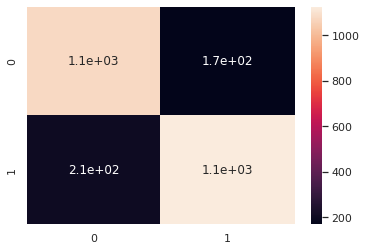

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

#Train and evaluate a K-NEAREST NEIGHBOUR (KNN)

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [ ]:

y_predict1 = model_knn.predict(X_test_norm) 

In [ ]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1246
           1       0.84      0.84      0.84      1331

    accuracy                           0.83      2577
   macro avg       0.83      0.83      0.83      2577
weighted avg       0.83      0.83      0.83      2577



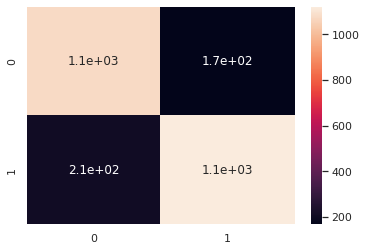

In [ ]:

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

#Train and evaluate a naive bayes classifier

In [ ]:
model_gnb = GaussianNB()
model_gnb.fit(X_train_norm, y_train)

GaussianNB()

In [ ]:
y_predict2 = model_gnb.predict(X_test_norm)

In [ ]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76      1246
           1       0.75      0.89      0.81      1331

    accuracy                           0.79      2577
   macro avg       0.80      0.78      0.78      2577
weighted avg       0.80      0.79      0.79      2577



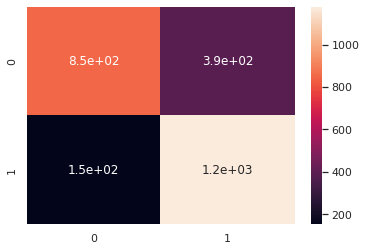

In [ ]:
cm = confusion_matrix(y_test, y_predict2)
sns.heatmap(cm, annot = True)

#Train and evaluate a random forest classifier 

In [ ]:
model_rf = RandomForestClassifier(n_estimators= 1000,criterion='entropy', random_state=0)
model_rf.fit(X_train_norm, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [ ]:
y_predict3 = model_rf.predict(X_test_norm)


In [ ]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1246
           1       0.87      0.85      0.86      1331

    accuracy                           0.86      2577
   macro avg       0.86      0.86      0.86      2577
weighted avg       0.86      0.86      0.86      2577



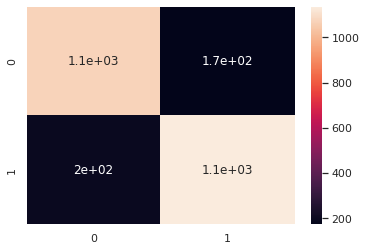

In [ ]:
cm = confusion_matrix(y_test, y_predict3)
sns.heatmap(cm, annot = True)

#Train and evaluate a  support vector machine classifier


In [ ]:
from sklearn.svm import SVC

model_svc = SVC(probability=True,random_state=2)
model_svc.fit(X_train_norm, y_train)

SVC(probability=True, random_state=2)

In [ ]:
y_predict4 = model_svc.predict(X_test_norm)

In [ ]:
print(classification_report(y_test, y_predict4))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1246
           1       0.87      0.84      0.85      1331

    accuracy                           0.85      2577
   macro avg       0.85      0.85      0.85      2577
weighted avg       0.85      0.85      0.85      2577



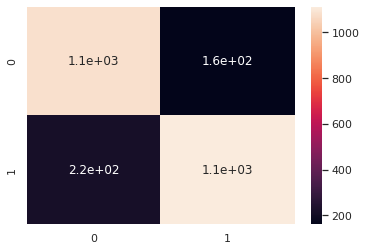

In [ ]:
cm = confusion_matrix(y_test, y_predict4)
sns.heatmap(cm, annot = True)

#Train and evaluate a Gradient Boosting (GradientBoostingClassifier)

In [ ]:
GB_model = GradientBoostingClassifier(n_estimators=100, min_samples_split=4,
                                      max_depth=1, loss='deviance',
                                      learning_rate=1.0, random_state=0,max_features='auto')
GB_model.fit(X_train_norm, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, max_features='auto',
                           min_samples_split=4, random_state=0)

In [ ]:

preds = GB_model.predict(X_test_norm)
metrics.accuracy_score(y_test, preds)

0.8486612339930152

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1246
           1       0.86      0.85      0.85      1331

    accuracy                           0.85      2577
   macro avg       0.85      0.85      0.85      2577
weighted avg       0.85      0.85      0.85      2577



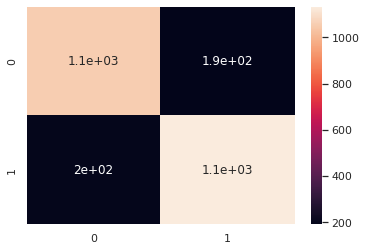

In [ ]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot = True)

#Plot ROC curves for the 6 models and find AUC scores

In [ ]:
# ROC curve

fpr1, tpr1, thresh1 = roc_curve(y_test, lr.predict_proba(X_test_norm)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_knn.predict_proba(X_test_norm)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_gnb.predict_proba(X_test_norm)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_rf.predict_proba(X_test_norm)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_svc.predict_proba(X_test_norm)[:, 1], pos_label = 1)
fpr6, tpr6, thresh6 = roc_curve(y_test, GB_model.predict_proba(X_test_norm)[:, 1], pos_label = 1)

In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, lr.predict_proba(X_test_norm)[:, 1])
auc_score2 = roc_auc_score(y_test, model_knn.predict_proba(X_test_norm)[:, 1])
auc_score3 = roc_auc_score(y_test, model_gnb.predict_proba(X_test_norm)[:, 1])
auc_score4 = roc_auc_score(y_test, model_rf.predict_proba(X_test_norm)[:, 1])
auc_score5 = roc_auc_score(y_test, model_svc.predict_proba(X_test_norm)[:, 1])
auc_score6 = roc_auc_score(y_test, GB_model.predict_proba(X_test_norm)[:, 1])


print("Logistic Regression: ", auc_score1) # Logistic Regression
print("K-Nearest Neighbors:", auc_score2) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score3) # Naive Bayes
print("Random Forest: ", auc_score4) # Random Forest
print("Support Vector Machine: ", auc_score5) # Support Vector Machine 
print("GradientBoostingClassifier :", auc_score6) # GradientBoostingClassifier


Logistic Regression:  0.9366899698871097
K-Nearest Neighbors: 0.9074930084308857
Naive Bayes:  0.858387410713532
Random Forest:  0.9331673526584847
Support Vector Machine:  0.9210184837912576
GradientBoostingClassifier : 0.9309330051506669


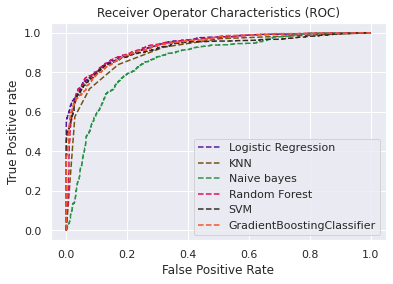

In [ ]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "#5a189a", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "#76520e", label = "KNN")
plt.plot(fpr3, tpr3, linestyle = "--", color = "#2b9348", label = "Naive bayes")
plt.plot(fpr4, tpr4, linestyle = "--", color = "#d81159", label = "Random Forest")
plt.plot(fpr5, tpr5, linestyle = "--", color = "#342a21", label = "SVM")
plt.plot(fpr6, tpr6, linestyle = "--", color = "#f2542d", label = "GradientBoostingClassifier")


plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

#CONCLUSION 

In [ ]:
y_predict3 = model_rf.predict(X_test_norm)
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1246
           1       0.87      0.85      0.86      1331

    accuracy                           0.86      2577
   macro avg       0.86      0.86      0.86      2577
weighted avg       0.86      0.86      0.86      2577



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

    Accuracy: ~86% label accuracy
    Precision: ~84% labeled as Retained customers and ~87% labeled as churned customers
    Recall: ~86% labeled as Retained customers and ~85% labeled as churned customers

Note: I will improve this model even more better by using "Grid Search" method.